In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import decimal
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%matplotlib inline

In [3]:
import geopandas as gpd
dados = pd.read_csv('brazil_covid19.csv')

In [4]:
dados['TdM'] = dados.deaths/dados.cases
dados.TdM.fillna(0,inplace=True)
dados.TdM = dados.TdM*100
dados.TdM = dados.TdM.round(2)

In [5]:
fp = 'UFEBRASIL.shp'

In [6]:
brazilmapa = gpd.read_file(fp)

In [7]:
dados.state = dados.state.apply(lambda x:x.upper())
dados.state = dados.state.replace('ESPÍRITO SANTO','ESPIRITO SANTO')

In [8]:
siglas = {
    'DISTRITO FEDERAL': 'DF',
    'GOIÁS':'GO',
    'MATO GROSSO':'MT',
    'MATO GROSSO DO SUL' : 'MS',
    'ALAGOAS': 'AL', 
    'BAHIA':'BA', 
    'CEARÁ' : 'CE', 
    'MARANHÃO':'MA', 
    'PARAÍBA':'PB', 
    'PERNAMBUCO':'PE',  
    'PIAUÍ': 'PI', 
    'RIO GRANDE DO NORTE':'RN', 
    'SERGIPE':'SE', 
    'ACRE':'AC', 
    'AMAPÁ':'AP',
    'AMAZONAS':'AM', 
    'PARÁ':'PA', 
    'RONDÔNIA':'RO', 
    'RORAIMA':'RR', 
    'TOCANTINS':'TO',       
    'ESPIRITO SANTO':'ES', 
    'MINAS GERAIS':'MG', 
    'RIO DE JANEIRO':'RJ', 
    'SÃO PAULO':'SP',
    'PARANÁ':'PR', 
    'RIO GRANDE DO SUL':'RS', 
    'SANTA CATARINA':'SC',
}

In [9]:
estados = dados.state.unique()
populacao = np.array([3015268,7018354,3484466,2778986,3337357, 14873064, 9132078, 7075181, 4018127, 9557071, 3273227, 3506853, 2298696, 881935, 845731, 4144597, 8602865, 1777225, 605761, 1572866, 4018650, 21168791, 17264943, 45919049, 11433957, 11377239,7164788])
estapop = np.array([estados,populacao])
popest = pd.DataFrame(estapop).transpose()
popest.set_axis(['state','pop'], axis=1, inplace=True)

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



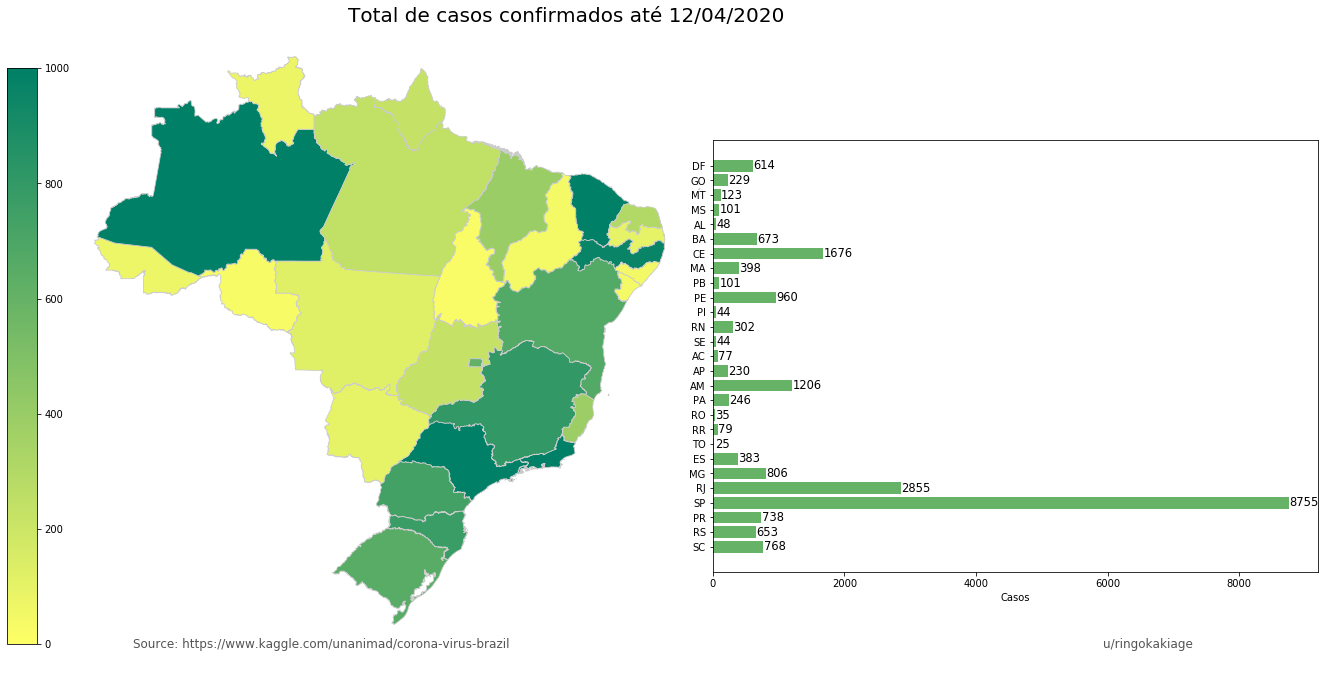

In [31]:
onebyone =  dados[dados['date']=='2020-04-12']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
variable = 'cases'
vmin, vmax = 0, 1000
merged.reset_index(inplace=True)
fig, ax = plt.subplots(1, figsize=(14,10))
merged.plot(column=variable,cmap='summer_r',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de casos confirmados até 12/04/2020', fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='summer_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax= cbaxes)
ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(onebyone.state)),width=onebyone.cases[::-1], align='center', tick_label=onebyone.state.replace(siglas)[::-1], alpha=0.6, color='green')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(onebyone.cases[::-1]):
    ax2.text(v+5, i, str(v), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos')
plt.tight_layout()
fig.savefig('20_04_12v3.png',dpi=300, bbox_inches='tight')

In [32]:
fig.savefig('20_04_12v3.png',dpi=300, bbox_inches='tight')

In [9]:
dados.date.unique()

array(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



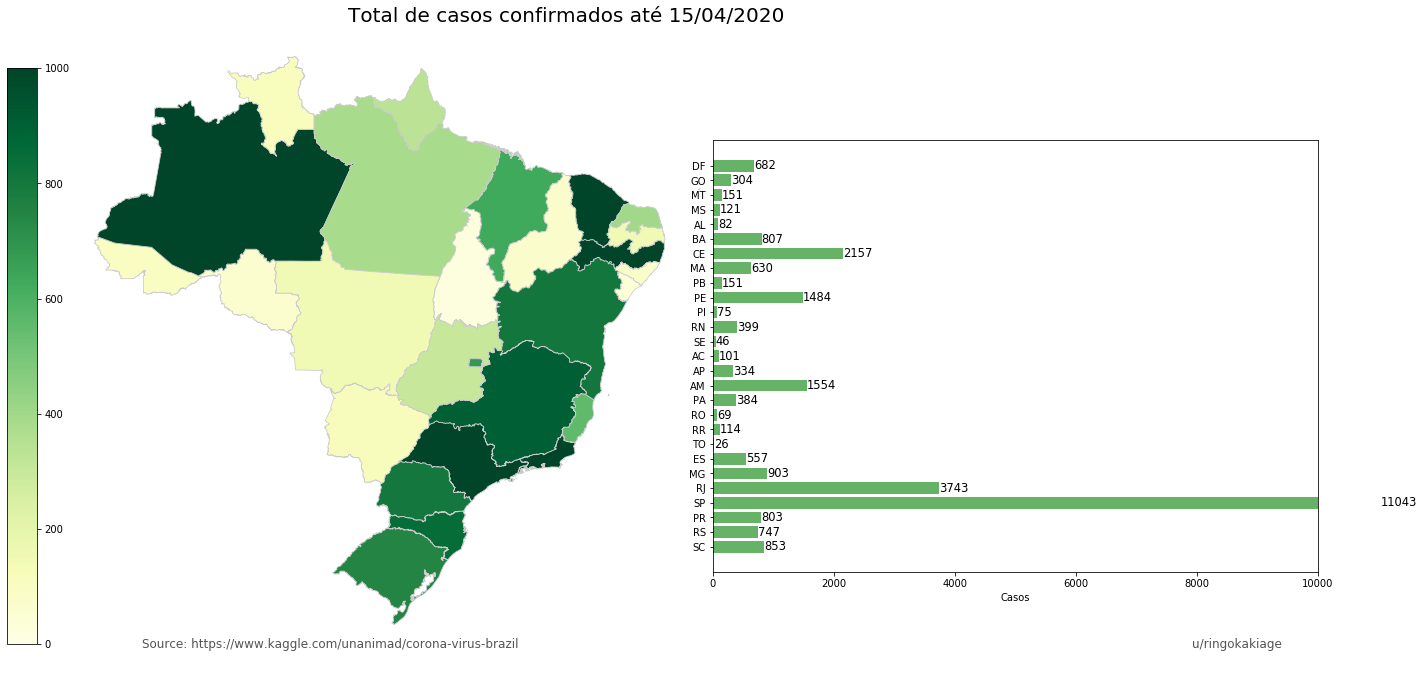

In [10]:
onebyone =  dados[dados['date']=='2020-04-15']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
variable = 'cases'
vmin, vmax = 0, 1000
merged.reset_index(inplace=True)
fig, ax = plt.subplots(1, figsize=(14,10))
merged.plot(column=variable,cmap='YlGn',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de casos confirmados até 15/04/2020', fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax= cbaxes)
ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(onebyone.state)),width=onebyone.cases[::-1], align='center', tick_label=onebyone.state.replace(siglas)[::-1], alpha=0.6, color='green')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(onebyone.cases[::-1]):
    ax2.text(v+2, i, str(v), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos')
plt.xlim(right=10000)
plt.tight_layout()

/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



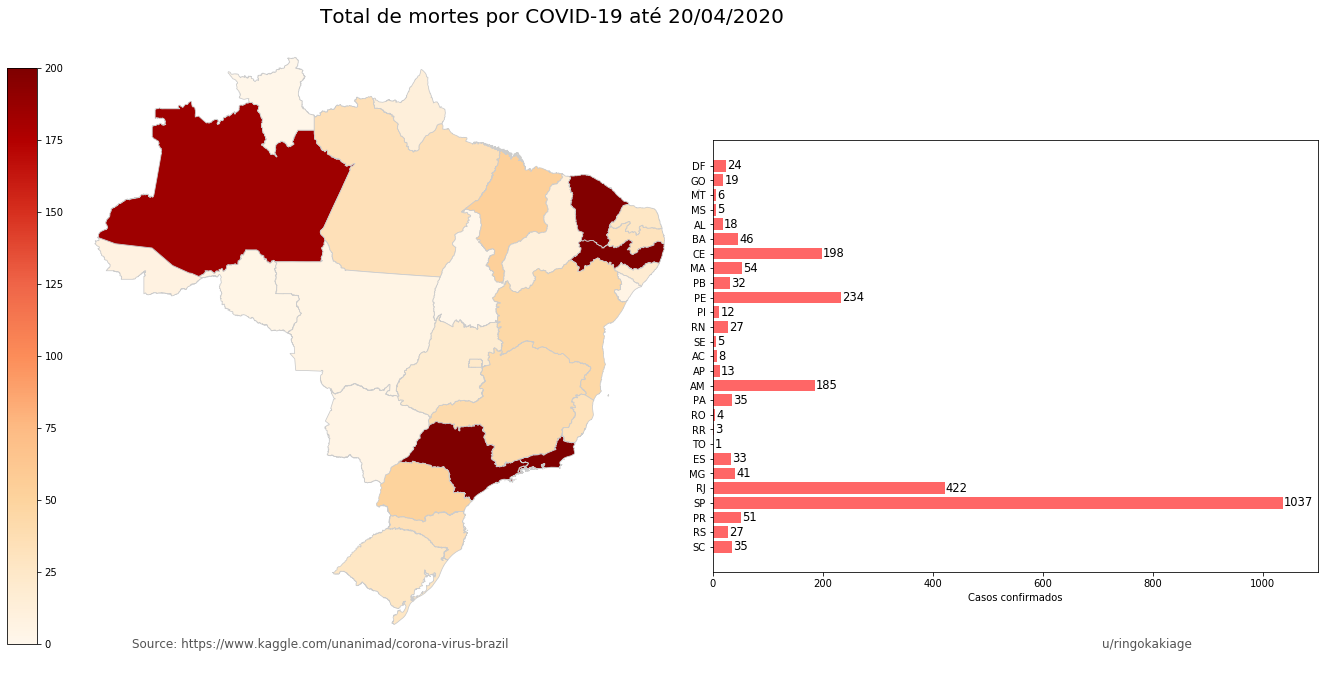

In [35]:
dia1 = '20/04/2020'
onebyone =  dados[dados['date']=='2020-04-20']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
variable = 'deaths'
vmin, vmax = 0, 200
merged.reset_index(inplace=True)
fig, ax = plt.subplots(1, figsize=(14,10))
merged.plot(column=variable,cmap='OrRd',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de mortes por COVID-19 até {}'.format(dia1), fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax= cbaxes)
ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(onebyone.state)),width=onebyone.deaths[::-1], align='center', tick_label=onebyone.state.replace(siglas)[::-1], alpha=0.6, color='red')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(onebyone.deaths[::-1]):
    ax2.text(v+2, i, str(v), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos confirmados')
plt.xlim(right=1100)
plt.tight_layout()
## fig.savefig('20_03_29_mortos_blob.png',dpi=300, bbox_inches='tight')

In [10]:
popest

,state,pop
0,DISTRITO FEDERAL,3015268
1,GOIÁS,7018354
2,MATO GROSSO,3484466
3,MATO GROSSO DO SUL,2778986
4,ALAGOAS,3337357
5,BAHIA,14873064
6,CEARÁ,9132078
7,MARANHÃO,7075181
8,PARAÍBA,4018127
9,PERNAMBUCO,9557071


In [37]:
merged.head()

,NM_ESTADO,ID,CD_GEOCODU,NM_REGIAO,geometry,date,region,cases,deaths,TdM
0,RONDÔNIA,1,11,NORTE,"POLYGON ((-63.32721 -7.97672, -63.11838 -7.977...",2020-04-20,Norte,160,4,2.50
1,ACRE,2,12,NORTE,"POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...",2020-04-20,Norte,176,8,4.55
2,AMAZONAS,3,13,NORTE,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",2020-04-20,Norte,2160,185,8.56
3,RORAIMA,4,14,NORTE,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",2020-04-20,Norte,244,3,1.23
4,PARÁ,5,15,NORTE,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",2020-04-20,Norte,902,35,3.88


/Users/viniciusnomiyama/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



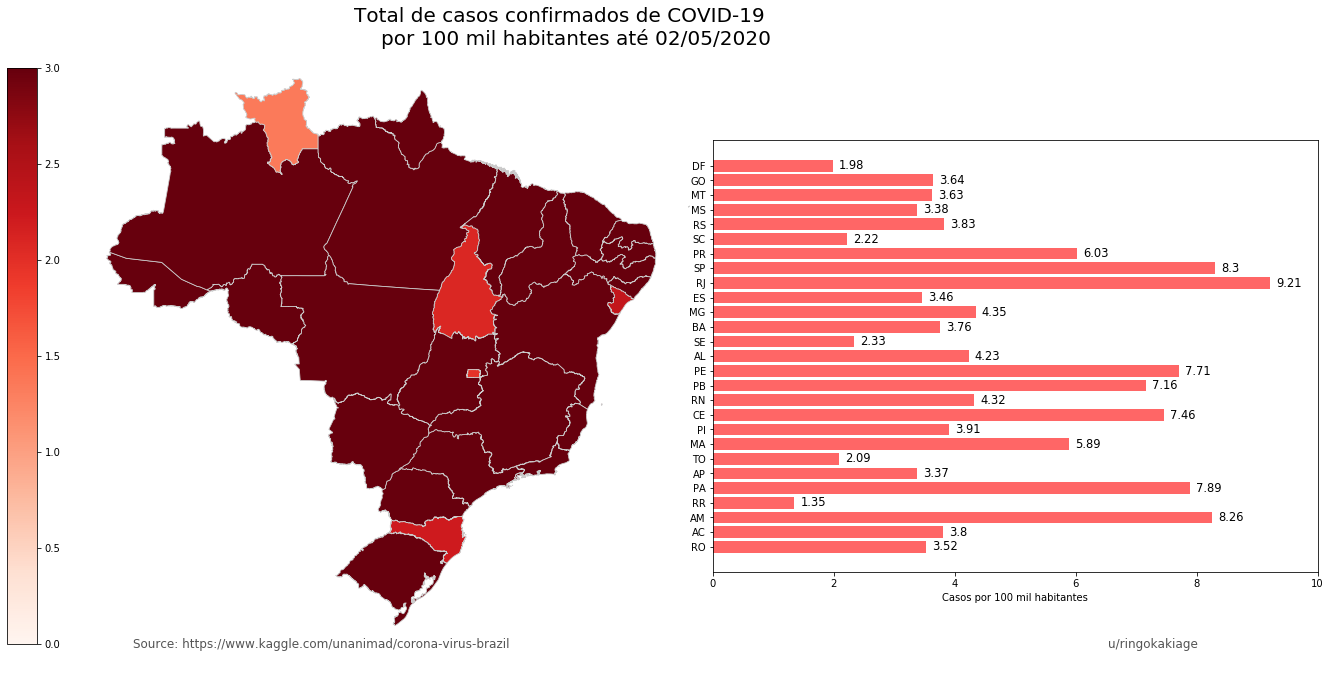

In [118]:
##casos por 100k habitantes:
dia1 = '02/05/2020'
onebyone =  dados[dados['date']=='2020-05-02']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
vmin, vmax = 0, 3
merged.reset_index(inplace=True)

mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
mergedmais.reset_index(inplace=True)
mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#variavel a ser apresentada
variable = 'TdM'

fig, ax = plt.subplots(1, figsize=(14,10))
mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=ax,edgecolor='0.8',vmin=vmin, vmax=vmax)
## merged200412.apply(lambda x: ax.annotate(s=x['NM_ESTADO'], xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
## merged200412.apply(lambda x: ax.annotate(s=x.cases, xy=x.geometry.centroid.coords[0], ha='center',color='Black'),axis=1);
ax.axis('off')
ax.set_title('Total de casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'20','fontweight':'3'},loc='right')
ax.annotate('u/ringokakiage',xy=(0.9, .07),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555')
ax.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.1, .07),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbaxes = fig.add_axes([0.1,0.1,0.03,0.8])
cbar = fig.colorbar(sm, cax=cbaxes)

ax2 = fig.add_axes([0.8,0.2,0.6,0.6])
rect = ax2.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
#rect = ax2.barh(np.arange(len(casos200412.state.replace(siglas))), casos200412.cases, 0.7,align='edge', label='casos confirmados', color='green', tick_label=casos200412.state.replace(siglas))
for i, v in enumerate(mergedmais[variable]):
    blob = decimal.Decimal(v)
    ax2.text(v+0.1, i, round(v,2), fontsize=11.5, ha='left', va='center')
ax2.set_xlabel('Casos por 100 mil habitantes')
plt.xlim(right=10)
plt.tight_layout()

In [17]:
onebyone.state

2187       DISTRITO FEDERAL
2188                  GOIÁS
2189            MATO GROSSO
2190     MATO GROSSO DO SUL
2191                ALAGOAS
2192                  BAHIA
2193                  CEARÁ
2194               MARANHÃO
2195                PARAÍBA
2196             PERNAMBUCO
2197                  PIAUÍ
2198    RIO GRANDE DO NORTE
2199                SERGIPE
2200                   ACRE
2201                  AMAPÁ
2202               AMAZONAS
2203                   PARÁ
2204               RONDÔNIA
2205                RORAIMA
2206              TOCANTINS
2207         ESPIRITO SANTO
2208           MINAS GERAIS
2209         RIO DE JANEIRO
2210              SÃO PAULO
2211                 PARANÁ
2212      RIO GRANDE DO SUL
2213         SANTA CATARINA
Name: state, dtype: object

In [20]:
abc

[28.92]

In [27]:
mergedmais.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
NM_ESTADO      27 non-null object
ID             27 non-null int64
CD_GEOCODU     27 non-null object
NM_REGIAO      27 non-null object
geometry       27 non-null geometry
date           27 non-null object
region         27 non-null object
cases          27 non-null int64
deaths         27 non-null int64
TdM            27 non-null float64
pop            27 non-null int64
cases/100k     27 non-null float64
deaths/100k    27 non-null float64
dtypes: float64(3), geometry(1), int64(4), object(5)
memory usage: 2.9+ KB


In [31]:
(mergedmais['deaths/100k']/mergedmais['cases/100k'])*100

0     3.522205
1     3.978300
2     8.264599
3     1.347305
4     7.890173
5     3.369840
6     2.094241
7     5.886991
8     3.909774
9     7.678421
10    4.319180
11    7.156673
12    7.710252
13    4.227405
14    2.329451
15    3.710407
16    4.349975
17    3.450586
18    9.207282
19    8.295374
20    6.032172
21    2.216539
22    3.829524
23    3.383459
24    3.625378
25    3.636364
26    1.979566
dtype: float64

In [32]:
mergedmais

,NM_ESTADO,ID,CD_GEOCODU,NM_REGIAO,geometry,date,region,cases,deaths,TdM,pop,cases/100k,deaths/100k
0,RONDÔNIA,1,11,NORTE,"POLYGON ((-63.32721 -7.97672, -63.11838 -7.977...",2020-05-02,Norte,653,23,3.52,1777225,36.742675,1.294152
1,ACRE,2,12,NORTE,"POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...",2020-05-02,Norte,553,22,3.98,881935,62.703034,2.494515
2,AMAZONAS,3,13,NORTE,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",2020-05-02,Norte,6062,501,8.26,4144597,146.262713,12.088027
3,RORAIMA,4,14,NORTE,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",2020-05-02,Norte,668,9,1.35,605761,110.274514,1.485734
4,PARÁ,5,15,NORTE,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",2020-05-02,Norte,3460,273,7.89,8602865,40.219160,3.173361
5,AMAPÁ,6,16,NORTE,"MULTIPOLYGON (((-51.17970 4.00008, -51.17784 3...",2020-05-02,Norte,1187,40,3.37,845731,140.351956,4.729636
6,TOCANTINS,1,17,NORTE,"POLYGON ((-48.35878 -5.17008, -48.35315 -5.173...",2020-05-02,Norte,191,4,2.09,1572866,12.143438,0.254313
7,MARANHÃO,1,21,NORDESTE,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...",2020-05-02,Nordeste,3805,224,5.89,7075181,53.779543,3.165997
8,PIAUÍ,1,22,NORDESTE,"POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...",2020-05-02,Nordeste,665,26,3.91,3273227,20.316342,0.794323
9,CEARÁ,2,23,NORDESTE,"POLYGON ((-41.16703 -4.46736, -41.16220 -4.466...",2020-05-02,Nordeste,8309,638,7.68,9132078,90.986958,6.986362


In [45]:
dados[dados['state']=='MINAS GERAIS'].cases.value_counts()

0       38
1        5
2        3
275      1
38       1
1189     1
35       1
498      1
1827     1
29       1
1308     1
153      1
1935     1
15       1
128      1
430      1
261      1
397      1
1548     1
1419     1
7        1
5        1
1154     1
130      1
2023     1
1021     1
806      1
205      1
884      1
370      1
1649     1
750      1
231      1
614      1
1758     1
83       1
903      1
1230     1
815      1
1586     1
1481     1
958      1
698      1
133      1
189      1
1283     1
314      1
655      1
525      1
1077     1
559      1
Name: cases, dtype: int64

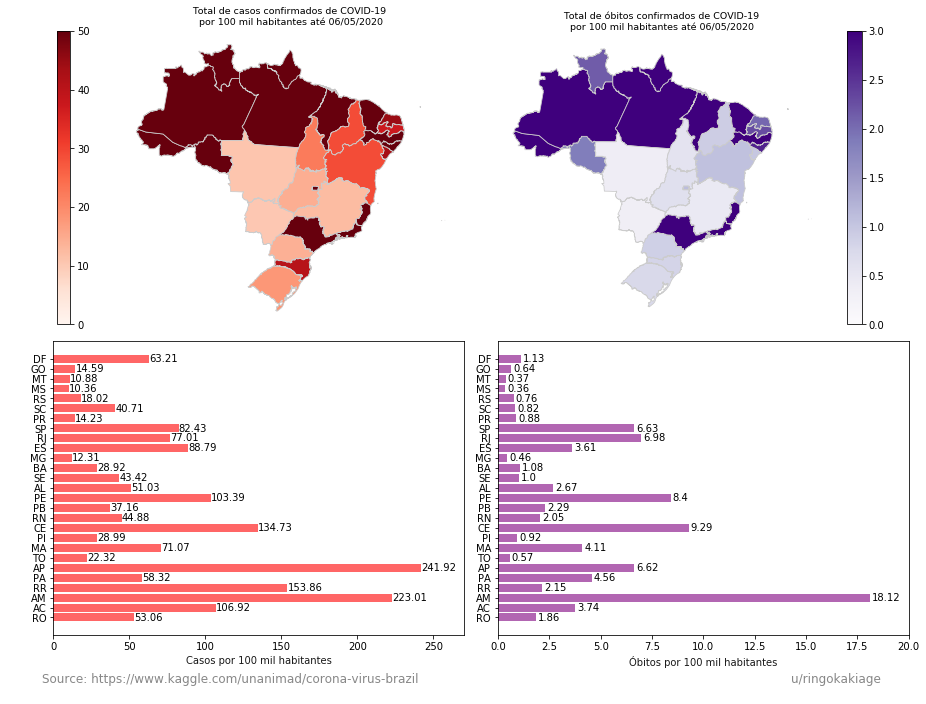

In [16]:
#standard settings for map plotting
dia1 = '06/05/2020'
onebyone =  dados[dados['date']=='2020-05-06']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
merged.reset_index(inplace=True)

#creating a dataframe for the 100k hab analysis
mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
mergedmais.reset_index(inplace=True)
mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#tentando plotar 2 mapas ao mesmo tempo
fig, axs = plt.subplots(2,2, figsize=(14,10))
(ax1,ax2) , (ax3,ax4) = axs

#variaveis a serem apresentadas
variable = 'cases/100k'
variable2 = 'deaths/100k'

#vmax and vmin
vmin1, vmax1 = 0, 50
vmin2, vmax2 = 0, 3

#plotando
mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=ax1,edgecolor='0.8',vmin=vmin1, vmax=vmax1)
mergedmais.plot(column=variable2,cmap='Purples',linewidth=0.8,ax=ax2,edgecolor='0.8',vmin=vmin2, vmax=vmax2)
ax1.axis('off')
ax2.axis('off')

#colorbars
sm1 = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
sm1._A= []
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('left', size='4%', pad=0.7)
cbar1 = fig.colorbar(sm1, ax=ax1, cax=cax1)

sm2 = plt.cm.ScalarMappable(cmap='Purples' ,norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
sm2._A = []
cbar2 = fig.colorbar(sm2, ax=ax2)

rect_3 = ax3.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
ax3.set_xlim(right=270)
rect_4 = ax4.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable2], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='purple')
ax4.set_xlim(right=20)

#colocando o valor de cada barra nos gráficos
for i, v in enumerate(mergedmais[variable]):
    ax3.text(v+0.1, i, round(v,2), fontsize=10, ha='left', va='center')
    
for i, v in enumerate(mergedmais[variable2]):
    ax4.text(v+0.1, i, round(v,2), fontsize=10, ha='left', va='center')

ax3.set_xlabel('Casos por 100 mil habitantes',alpha=0.9)
ax4.set_xlabel('Óbitos por 100 mil habitantes', alpha=0.9)

#titles
ax1.set_title('Total de casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')
ax2.set_title('Total de óbitos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')

#sources
ax4.annotate('u/ringokakiage',xy=(0.95, .045),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
ax3.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.045, .045),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
    
plt.tight_layout()

In [19]:
mergedmais.cases.sum()

96559

In [22]:
mergedmais.deaths.sum()/mergedmais.cases.sum()

0.0699054464110026

In [37]:
mergedmais.cases - (round(mergedmais.deaths/0.03,2))

0      -113.67
1      -180.33
2    -10638.00
3       368.00
4     -5640.00
5      -146.33
6        57.67
7     -3661.67
8      -201.67
9    -12957.67
10     -600.67
11    -1432.67
12   -12788.33
13     -561.33
14      134.33
15     -785.00
16     -910.33
17     -448.33
18   -21820.67
19   -55026.00
20    -1508.00
21      612.67
22     -447.67
23      -34.00
24      -69.00
25     -175.00
26      532.67
dtype: float64

In [12]:
mergedmais

,NM_ESTADO,ID,CD_GEOCODU,NM_REGIAO,geometry,date,region,cases,deaths,TdM,pop,cases/100k,deaths/100k
0,RONDÔNIA,1,11,NORTE,"POLYGON ((-63.32721 -7.97672, -63.11838 -7.977...",2020-05-06,Norte,943,33,3.50,1777225,53.060248,1.856827
1,ACRE,2,12,NORTE,"POLYGON ((-73.18253 -7.33550, -73.13680 -7.352...",2020-05-06,Norte,943,33,3.50,881935,106.923980,3.741772
2,AMAZONAS,3,13,NORTE,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125...",2020-05-06,Norte,9243,751,8.13,4144597,223.013239,18.119976
3,RORAIMA,4,14,NORTE,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045...",2020-05-06,Norte,932,13,1.39,605761,153.856059,2.146061
4,PARÁ,5,15,NORTE,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...",2020-05-06,Norte,5017,392,7.81,8602865,58.317781,4.556622
5,AMAPÁ,6,16,NORTE,"MULTIPOLYGON (((-51.17970 4.00008, -51.17784 3...",2020-05-06,Norte,2046,56,2.74,845731,241.920894,6.621491
6,TOCANTINS,1,17,NORTE,"POLYGON ((-48.35878 -5.17008, -48.35315 -5.173...",2020-05-06,Norte,351,9,2.56,1572866,22.315951,0.572204
7,MARANHÃO,1,21,NORDESTE,"MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...",2020-05-06,Nordeste,5028,291,5.79,7075181,71.065320,4.112969
8,PIAUÍ,1,22,NORDESTE,"POLYGON ((-41.74605 -2.80350, -41.74241 -2.805...",2020-05-06,Nordeste,949,30,3.16,3273227,28.992795,0.916527
9,CEARÁ,2,23,NORDESTE,"POLYGON ((-41.16703 -4.46736, -41.16220 -4.466...",2020-05-06,Nordeste,12304,848,6.89,9132078,134.733847,9.285948


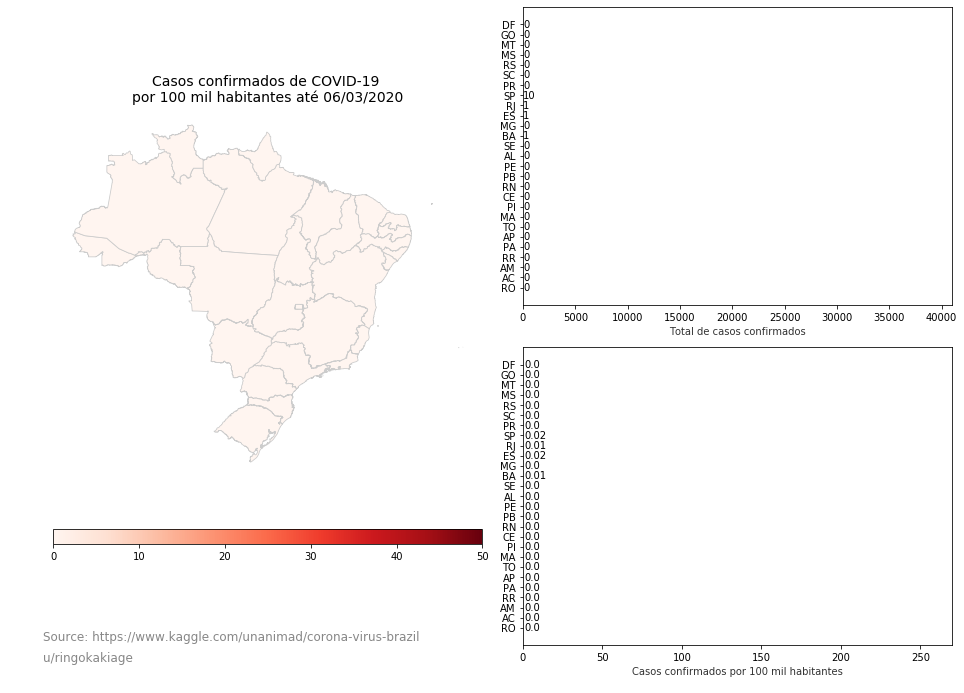

In [235]:
#standard settings for map plotting
dia1 = '06/03/2020'
onebyone =  dados[dados['date']=='2020-03-06']
merged = brazilmapa.set_index('NM_ESTADO').join(onebyone.set_index('state'))
merged.reset_index(inplace=True)

#creating a dataframe for the 100k hab analysis
mergedmais = merged.set_index('NM_ESTADO').join(popest.set_index('state'))
mergedmais.reset_index(inplace=True)
mergedmais['pop'] = mergedmais['pop'].astype(str).astype(int)
mergedmais['cases/100k'] = ((mergedmais.cases/mergedmais['pop'])*100000)
mergedmais['deaths/100k'] = ((mergedmais.deaths/mergedmais['pop'])*100000)

#tentando plotar 2 mapas ao mesmo tempo
fig, axs = plt.subplots(2,2, figsize=(14,10))
(ax1,ax2),(ax3,ax4) = axs
bap = axs[1,-1].get_gridspec()
for ax in axs[0:,0]:
    ax.remove()
axbig = fig.add_subplot(bap[0:,0])

#variaveis a serem apresentadas
variable = 'cases/100k'
variable2 = 'cases'

#vmax and vmin
vmin1, vmax1 = 0, 50
vmin2, vmax2 = 0, 5000

#plotando
mergedmais.plot(column=variable,cmap='Reds',linewidth=0.8,ax=axbig,edgecolor='0.8',vmin=vmin1, vmax=vmax1)
#mergedmais.plot(column=variable2,cmap='Purples',linewidth=0.8,ax=ax2,edgecolor='0.8',vmin=vmin2, vmax=vmax2)
axbig.axis('off')
#ax2.axis('off')

#colorbars
sm1 = plt.cm.ScalarMappable(cmap='Reds' ,norm=plt.Normalize(vmin=vmin1, vmax=vmax1))
sm1._A= []
divider1 = make_axes_locatable(axbig)
cax1 = divider1.append_axes('bottom', size='4%', pad=0.7)
cbar1 = fig.colorbar(sm1, ax=axbig, cax=cax1, orientation='horizontal')

#sm2 = plt.cm.ScalarMappable(cmap='Purples' ,norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
#sm2._A = []
#cbar2 = fig.colorbar(sm2, ax=ax2)

rect_4 = ax4.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.6, color='red')
ax4.set_xlim(right=270)
rect_2 = ax2.barh(np.arange(len(mergedmais['NM_ESTADO'])),width=mergedmais[variable2], align='center', tick_label=mergedmais['NM_ESTADO'].replace(siglas), alpha=0.3, color='black')
ax2.set_xlim(right=41000)

#colocando o valor de cada barra nos gráficos
for i, v in enumerate(mergedmais[variable]):
    ax4.text(v+1, i, round(v,2), fontsize=10, ha='left', va='center')
    
for i, v in enumerate(mergedmais[variable2]):
    ax2.text(v+1, i, round(v,2), fontsize=10, ha='left', va='center')

ax4.set_xlabel('Casos confirmados por 100 mil habitantes',alpha=0.8, fontsize=10)
ax2.set_xlabel('Total de casos confirmados', alpha=0.8, fontsize=10)

#titles
axbig.set_title('Casos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'14','fontweight':'3'},loc='center')
#ax2.set_title('Total de óbitos confirmados de COVID-19 \npor 100 mil habitantes até {}'.format(dia1), fontdict={'fontsize':'9.5','fontweight':'3'},loc='center')

#sources
axbig.annotate('u/ringokakiage',xy=(0.045, .06),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
axbig.annotate('Source: https://www.kaggle.com/unanimad/corona-virus-brazil',xy=(0.045, .09),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555', alpha=0.7)
    
plt.tight_layout()
#fig.savefig('100k_20_03_06.png',dpi=300, bbox_inches='tight')

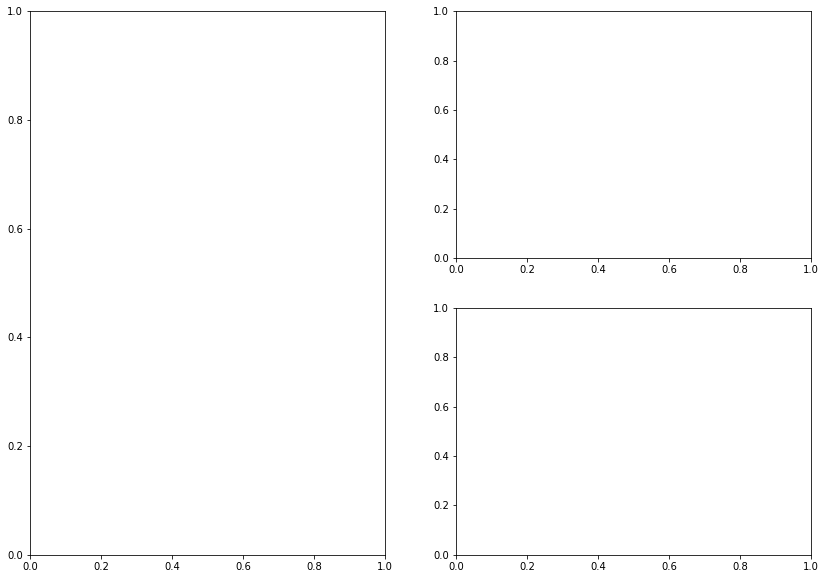

In [95]:
fig, axs = plt.subplots(2,2, figsize=(14,10))
(ax1,ax2),(ax3,ax4) = axs
bap = axs[1,-1].get_gridspec()
for ax in axs[0:,0]:
    ax.remove()
axbig = fig.add_subplot(bap[0:,0])